In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv(r'C:\Users\Urvashi\Desktop\Urvashi\Career\Study Notes\All_Notes\Projects\7-Data_Science_Projects\1-Data Analysis\2-Analyze Retail Sales\vinodSales.csv')

In [3]:
sales.head()

,product_code,customer_code,custmer_name,customer_type,market_code,zone,markets_name,order_date,cy_date,year,month_name,date_yy_mmm,year.1,sales_amount,sales_qty,currency,product_type
0,Prod001,Cus001,Surge Stores,Brick & Mortar,Mark001,South,Chennai,10-10-2017,01-10-2017,2017,October,17-Oct\r,2017,41241,100,INR,Own Brand\r
1,Prod001,Cus002,Nomad Stores,Brick & Mortar,Mark002,Central,Mumbai,08-05-2018,01-05-2018,2018,May,18-May\r,2018,-1,3,INR,Own Brand\r
2,Prod002,Cus003,Excel Stores,Brick & Mortar,Mark003,North,Ahmedabad,06-04-2018,01-04-2018,2018,April,18-Apr\r,2018,875,1,INR,Own Brand\r
3,Prod002,Cus003,Excel Stores,Brick & Mortar,Mark003,North,Ahmedabad,11-04-2018,01-04-2018,2018,April,18-Apr\r,2018,583,1,INR,Own Brand\r
4,Prod002,Cus004,Surface Stores,Brick & Mortar,Mark003,North,Ahmedabad,18-06-2018,01-06-2018,2018,June,18-Jun\r,2018,7176,6,INR,Own Brand\r


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95124 entries, 0 to 95123
Data columns (total 17 columns):
product_code     95124 non-null object
customer_code    95124 non-null object
custmer_name     95124 non-null object
customer_type    95124 non-null object
market_code      95124 non-null object
zone             95124 non-null object
markets_name     95124 non-null object
order_date       95124 non-null object
cy_date          95124 non-null object
year             95124 non-null int64
month_name       95124 non-null object
date_yy_mmm      95124 non-null object
year.1           95124 non-null int64
sales_amount     95124 non-null int64
sales_qty        95124 non-null int64
currency         95124 non-null object
product_type     95124 non-null object
dtypes: int64(4), object(13)
memory usage: 12.3+ MB


In [5]:
sales.describe()

,year,year.1,sales_amount,sales_qty
count,95124.000000,95124.000000,9.512400e+04,95124.000000
mean,2018.549588,2018.549588,5.441366e+03,21.279667
std,0.854359,0.854359,2.339846e+04,142.386853
min,2017.000000,2017.000000,-1.000000e+00,1.000000
25%,2018.000000,2018.000000,1.900000e+02,1.000000
50%,2019.000000,2019.000000,5.830000e+02,2.000000
75%,2019.000000,2019.000000,3.097000e+03,10.000000
max,2020.000000,2020.000000,1.510944e+06,14049.000000


In [7]:
sales.shape

(95124, 17)

In [8]:
sales.isnull().sum()

product_code     0
customer_code    0
custmer_name     0
customer_type    0
market_code      0
zone             0
markets_name     0
order_date       0
cy_date          0
year             0
month_name       0
date_yy_mmm      0
year.1           0
sales_amount     0
sales_qty        0
currency         0
product_type     0
dtype: int64

In [9]:
sum(sales.duplicated())

0

### What is the total sales amount and quantity for each customer type?

In [13]:
sales.groupby('customer_type')['sales_amount'].sum()

customer_type
Brick & Mortar    382396480
E-Commerce        135208047
Name: sales_amount, dtype: int64

In [14]:
sales.groupby('customer_type')['sales_qty'].sum()

customer_type
Brick & Mortar    1573623
E-Commerce         450584
Name: sales_qty, dtype: int64

### What is the total sales amount for each market and zone?

In [15]:
sales.groupby('markets_name')['sales_amount'].sum()

markets_name
Ahmedabad        67291028
Bengaluru          329740
Bhopal           31663807
Bhubaneshwar       893351
Chennai           9252311
Delhi NCR       243840918
Hyderabad         7436823
Kanpur            6746623
Kochi            17455980
Lucknow            955850
Mumbai           81804809
Nagpur           46349077
Patna             1804688
Surat             1779522
Name: sales_amount, dtype: int64

In [16]:
sales.groupby('zone')['sales_amount'].sum()

zone
Central    159817693
North      322418629
South       35368205
Name: sales_amount, dtype: int64

### How does the sales amount vary by year?

In [24]:
yearly_sales = sales.groupby('year')['sales_amount'].sum()

In [33]:
yearly_sales

year
2017     44664782
2018    213695141
2019    181838907
2020     77405697
Name: sales_amount, dtype: int64

In [30]:
yearly_sales.sort_values(ascending=False)

year
2018    213695141
2019    181838907
2020     77405697
2017     44664782
Name: sales_amount, dtype: int64

In [38]:
yearly_sales_values = sales.groupby('year')['sales_amount'].sum().values
yearly_sales_values

array([ 44664782, 213695141, 181838907,  77405697], dtype=int64)

In [40]:
year = sales.groupby('year')['sales_amount'].sum().index
year

Int64Index([2017, 2018, 2019, 2020], dtype='int64', name='year')

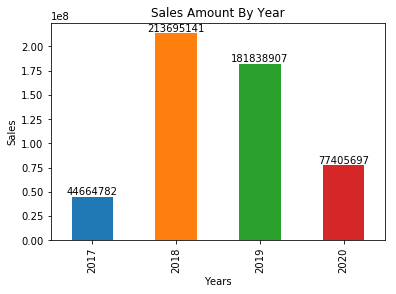

In [67]:
yearly_sales.plot(kind='bar')
plt.bar(x=year, height=yearly_sales_values)
plt.title('Sales Amount By Year')
plt.xlabel('Years')
plt.ylabel('Sales')
for i in range(len(yearly_sales_values)):
    plt.text(i, yearly_sales_values[i], yearly_sales_values[i], ha='center', va='bottom', fontsize='10')
plt.show()

### What is the total sales amount for each product type and market?

In [68]:
sales.groupby('product_type')['sales_amount'].sum()

product_type
Distribution\r    146039576
Own Brand\r       371564951
Name: sales_amount, dtype: int64

In [70]:
sales.groupby('markets_name')['sales_amount'].sum()

markets_name
Ahmedabad        67291028
Bengaluru          329740
Bhopal           31663807
Bhubaneshwar       893351
Chennai           9252311
Delhi NCR       243840918
Hyderabad         7436823
Kanpur            6746623
Kochi            17455980
Lucknow            955850
Mumbai           81804809
Nagpur           46349077
Patna             1804688
Surat             1779522
Name: sales_amount, dtype: int64

In [71]:
cities = sales.groupby('markets_name')['sales_amount'].sum().index
cities

Index(['Ahmedabad', 'Bengaluru', 'Bhopal', 'Bhubaneshwar', 'Chennai',
       'Delhi NCR', 'Hyderabad', 'Kanpur', 'Kochi', 'Lucknow', 'Mumbai',
       'Nagpur', 'Patna', 'Surat'],
      dtype='object', name='markets_name')

In [72]:
cities_sales = sales.groupby('markets_name')['sales_amount'].sum().values
cities_sales

array([ 67291028,    329740,  31663807,    893351,   9252311, 243840918,
         7436823,   6746623,  17455980,    955850,  81804809,  46349077,
         1804688,   1779522], dtype=int64)

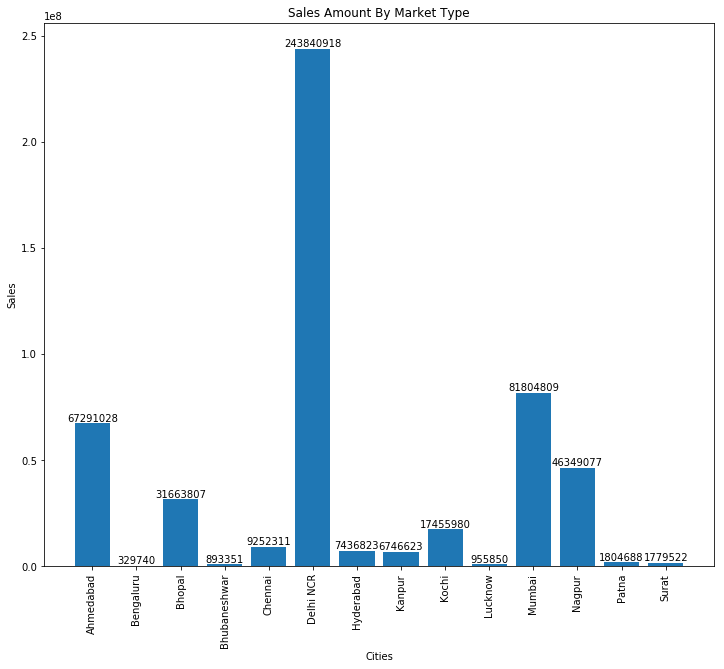

In [79]:
plt.figure(figsize=(12,10))
plt.bar(x=cities, height=cities_sales)
plt.xticks(rotation=90)
plt.title('Sales Amount By Market Type')
plt.xlabel('Cities')
plt.ylabel('Sales')
for i in range(len(cities_sales)):
    plt.text(i, cities_sales[i], cities_sales[i], ha='center', va='bottom', fontsize='10')
plt.show()

### Which product types have the highest and lowest sales amount?

In [80]:
sales.head()

,product_code,customer_code,custmer_name,customer_type,market_code,zone,markets_name,order_date,cy_date,year,month_name,date_yy_mmm,year.1,sales_amount,sales_qty,currency,product_type
0,Prod001,Cus001,Surge Stores,Brick & Mortar,Mark001,South,Chennai,10-10-2017,01-10-2017,2017,October,17-Oct\r,2017,41241,100,INR,Own Brand\r
1,Prod001,Cus002,Nomad Stores,Brick & Mortar,Mark002,Central,Mumbai,08-05-2018,01-05-2018,2018,May,18-May\r,2018,-1,3,INR,Own Brand\r
2,Prod002,Cus003,Excel Stores,Brick & Mortar,Mark003,North,Ahmedabad,06-04-2018,01-04-2018,2018,April,18-Apr\r,2018,875,1,INR,Own Brand\r
3,Prod002,Cus003,Excel Stores,Brick & Mortar,Mark003,North,Ahmedabad,11-04-2018,01-04-2018,2018,April,18-Apr\r,2018,583,1,INR,Own Brand\r
4,Prod002,Cus004,Surface Stores,Brick & Mortar,Mark003,North,Ahmedabad,18-06-2018,01-06-2018,2018,June,18-Jun\r,2018,7176,6,INR,Own Brand\r


In [89]:
# Highest Sales
sales[['product_type','sales_amount']].sort_values(by='sales_amount', ascending=False).head()

,product_type,sales_amount
3592,Own Brand\r,1510944
21204,Distribution\r,1477394
3667,Own Brand\r,1283875
2204,Own Brand\r,1283875
21178,Distribution\r,1235347


In [90]:
# Lowest Sales
sales[['product_type', 'sales_amount']].sort_values(by='sales_amount')[:8]

,product_type,sales_amount
282,Own Brand\r,-1
1,Own Brand\r,-1
48220,Distribution\r,0
2203,Own Brand\r,0
48332,Own Brand\r,0
78755,Distribution\r,0
48488,Own Brand\r,0
48530,Own Brand\r,0
